In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [2]:
bank_data = pd.read_csv('MyBank_DATA.csv')#importing raw dataset
bank_data.drop(['CUST_ID','random'],axis=1,inplace=True)#dropping non-relevent columns(based on intuation)
bank_data.drop('ACC_OP_DATE',axis=1,inplace=True)

#conevrt categories to numeric using LabelEncoder
label = LabelEncoder()
encoded_GENDER = label.fit_transform(bank_data['GENDER'])
encoded_OCCUPATION=label.fit_transform(bank_data['OCCUPATION'])
encoded_AGE_BKT=label.fit_transform(bank_data['AGE_BKT'])
encoded_ACC_TYPE=label.fit_transform(bank_data['ACC_TYPE'])

#Replacing the encoded with original
bank_data['GENDER'] = encoded_GENDER
bank_data['OCCUPATION']= encoded_OCCUPATION
bank_data['AGE_BKT'] = encoded_AGE_BKT
bank_data['ACC_TYPE'] = encoded_ACC_TYPE


In [3]:
bank_data.head().T

,0,1,2,3,4
TARGET,0.00,0.00,0.00,0.00,0.00
AGE,27.00,47.00,40.00,53.00,36.00
GENDER,1.00,1.00,1.00,1.00,1.00
BALANCE,3383.75,287489.04,18216.88,71720.48,1671622.89
OCCUPATION,2.00,1.00,2.00,1.00,0.00
AGE_BKT,0.00,4.00,2.00,6.00,2.00
SCR,776.00,324.00,603.00,196.00,167.00
HOLDING_PERIOD,30.00,28.00,2.00,13.00,24.00
ACC_TYPE,1.00,1.00,1.00,0.00,1.00
LEN_OF_RLTN_IN_MNTH,146.00,104.00,61.00,107.00,185.00


In [4]:

target = bank_data['TARGET']
bank_data.drop('TARGET',axis=1,inplace=True)
#Normalizing data using Standard Scalar
scalar = StandardScaler()
data=scalar.fit_transform(bank_data)
data = pd.DataFrame(data)
data.columns= bank_data.columns
data=pd.concat([data,target],axis=1)

In [6]:
data.head().T

,0,1,2,3,4
AGE,-1.192154,0.896020,0.165159,1.522472,-0.252476
GENDER,0.568570,0.568570,0.568570,0.568570,0.568570
BALANCE,-0.702040,-0.309399,-0.681540,-0.607597,1.603512
OCCUPATION,0.505220,-0.371213,0.505220,-0.371213,-1.247646
AGE_BKT,-1.354386,0.609204,-0.372591,1.590998,-0.372591
SCR,1.344037,-0.464822,0.651708,-0.977065,-1.093120
HOLDING_PERIOD,1.740757,1.509340,-1.499077,-0.226285,1.046507
ACC_TYPE,0.518764,0.518764,0.518764,-1.927659,0.518764
LEN_OF_RLTN_IN_MNTH,0.377793,-0.386502,-1.168996,-0.331910,1.087496
NO_OF_L_CR_TXNS,-0.440110,-0.357817,-0.193229,1.946403,0.629706


In [7]:
X = data.drop('TARGET',axis =1)
y= target
#choosing appropriate features based on vif
features = add_constant(X)
vifs= pd.Series([vif(features.values, i) 
               for i in range(features.shape[1])], 
              index=features.columns)
vifs


const                       1.000000e+00
AGE                         1.739117e+00
GENDER                      1.085581e+00
BALANCE                     1.050760e+00
OCCUPATION                  1.048791e+00
AGE_BKT                     1.706073e+00
SCR                         1.009885e+00
HOLDING_PERIOD              1.533229e+00
ACC_TYPE                    1.778258e+00
LEN_OF_RLTN_IN_MNTH         1.004358e+00
NO_OF_L_CR_TXNS             1.593624e+04
NO_OF_L_DR_TXNS                      inf
TOT_NO_OF_L_TXNS            3.403778e+04
NO_OF_BR_CSH_WDL_DR_TXNS             inf
NO_OF_ATM_DR_TXNS                    inf
NO_OF_NET_DR_TXNS                    inf
NO_OF_MOB_DR_TXNS                    inf
NO_OF_CHQ_DR_TXNS                    inf
FLG_HAS_CC                  1.007090e+00
AMT_ATM_DR                           inf
AMT_BR_CSH_WDL_DR                    inf
AMT_CHQ_DR                           inf
AMT_NET_DR                           inf
AMT_MOB_DR                           inf
AMT_L_DR        

In [8]:
#remove features with vif>10 and infinity
X.drop('NO_OF_L_DR_TXNS',axis=1,inplace=True)#1
X.drop('NO_OF_L_CR_TXNS',axis=1,inplace=True)#2
X.drop('AMT_ATM_DR',axis=1,inplace=True)#3
X.drop('TOT_NO_OF_L_TXNS',axis=1,inplace=True)#4
X.drop('NO_OF_BR_CSH_WDL_DR_TXNS',axis=1,inplace=True)#5
X.drop('NO_OF_ATM_DR_TXNS',axis=1,inplace=True)#6
X.drop('NO_OF_NET_DR_TXNS',axis=1,inplace=True)#7
X.drop('NO_OF_MOB_DR_TXNS',axis=1,inplace=True)#8
X.drop('NO_OF_CHQ_DR_TXNS',axis=1,inplace=True)#9
X.drop('AMT_CHQ_DR',axis=1,inplace=True)#10
X.drop('AMT_NET_DR',axis=1,inplace=True)#11
X.drop('AMT_MOB_DR',axis=1,inplace=True)#12
X.drop('AMT_L_DR',axis=1,inplace=True)#13
X.drop('AVG_AMT_PER_MOB_TXN',axis=1,inplace=True)#14
X.drop('AMT_BR_CSH_WDL_DR',axis=1,inplace=True)#15
X.drop('AGE',axis=1,inplace =True)#16 special case ,age represents same data as age_bkt 

In [9]:
X.shape

(20000, 20)

In [10]:
X.columns #final features,we are left with 20 out of 40

Index(['GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR', 'HOLDING_PERIOD',
       'ACC_TYPE', 'LEN_OF_RLTN_IN_MNTH', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS',
       'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'],
      dtype='object')

In [11]:
#splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [12]:
X.columns

Index(['GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR', 'HOLDING_PERIOD',
       'ACC_TYPE', 'LEN_OF_RLTN_IN_MNTH', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS',
       'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'],
      dtype='object')

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Using diffrent models to predict, later we will choose best one 
models=[]
models.append(('Logistic', LogisticRegression()))
models.append(('Decision Trees', DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Adaboost',AdaBoostClassifier(RandomForestClassifier(),n_estimators=80)))
models.append(('Naive_Bays',GaussianNB()))


In [17]:
results = []
num_folds = 10
names = []
model_comp=pd.DataFrame(columns=['Model','Test Accuracy'])
for name, model in models:#Iterating over models and using k-fold cross validation .
    kfold = KFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, X, target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean()}],ignore_index=True)
    

In [18]:
print(model_comp)#These are average accuracy of models based on appropriate cross validation

            Model  Test Accuracy
0        Logistic        0.87375
1  Decision Trees        0.94690
2   Random Forest        0.97400
3        Adaboost        0.97410
4      Naive_Bays        0.82415


In [19]:
for name,model in models:
    print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
<class 'sklearn.naive_bayes.GaussianNB'>


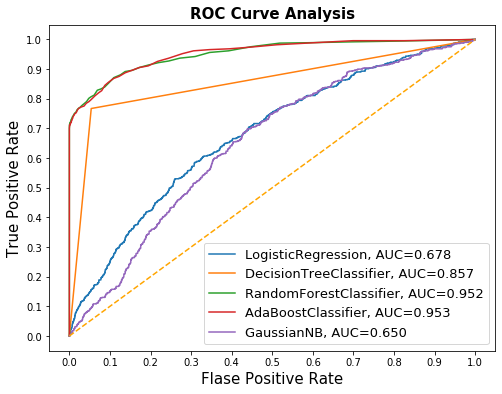

In [20]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])#Plotting roc_auc curve for all models.
from sklearn.metrics import roc_curve, roc_auc_score
# Train the models and record the results
for name,cls in models:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Classification report for Random Forest


In [24]:
models[2][1]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
from sklearn.metrics import classification_report
random_forest_test_predicitions = models[2][1].predict(X_test)
target_names  = ['Not Interested','Interested']
classification_report_random_forest_test=classification_report(y_test,random_forest_test_predicitions,target_names=target_names)

In [29]:
print(classification_report_random_forest_test)

                precision    recall  f1-score   support

Not Interested       0.96      1.00      0.98      5270
    Interested       1.00      0.71      0.83       730

      accuracy                           0.96      6000
     macro avg       0.98      0.85      0.90      6000
  weighted avg       0.97      0.96      0.96      6000



In [31]:
from sklearn.metrics import confusion_matrix as cm
random_forest_test_cm=cm(y_test,random_forest_test_predicitions)
confusion_matrix =pd.DataFrame(random_forest_test_cm,columns=['False','True'],index= ['Negatives','Positives'])
print(confusion_matrix)

           False  True
Negatives   5268     2
Positives    212   518


# Conclusion

Based on supervised machine learning techniques-Random Forest,Logistic Regression,Adaboost,Naive Bayes,Decision Tree, we can conclude that out of 5 machine learning techniques,random Forest is best fit for personal loan campign dataset.

Random Forest predicted best amount of True positives.  

Hence, we recommend MyBank to perform Random Forest Model on customer dataset to identify potential buyers of loan.